# Problem Set 2: Classification

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer (use "Raw" link on gist\github), run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

If a certain output is given for some cells, that means that you are expected to get similar results in order to receive full points (small deviations are fine). For some parts we have already written the code for you. You should read it closely and understand what it does.

Total: 100 points.

### 1. Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student
gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine
each applicant’s chance of admission based on their results on two exams. You have historical
data from previous applicants in *ex2data1.txt* that you can use as a training set for logistic regression. For each
training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. This outline and code framework will guide you through the exercise.

**1\.1 Implementation**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**1.1.1 Visualizing the data**

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. This first part of the code will load the data and display it on a 2-dimensional plot by calling the function plotData. The axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [2]:
datafile = 'ex2data1.txt'
# Read in comma separated data in datafile
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
# Form the usual "X" data matrix and "y" label vector
X = np.transpose(np.array(cols[:-1]))
#print(X)
y = np.transpose(np.array(cols[-1:]))
#print(y)
m = y.size # number of training examples
#print(m)
# Insert the usual column of 1's into the "X" matrix (for bias incorporation)
X = np.insert(X,0,1,axis=1)
print(X)

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]
 [  1.          45.08327748  56.31637178]
 [  1.          61.10666454  96.51142588]
 [  1.          75.02474557  46.55401354]
 [  1.          76.0987867   87.42056972]
 [  1.          84.43281996  43.53339331]
 [  1.          95.86155507  38.22527806]
 [  1.          75.01365839  30.60326323]
 [  1.          82.30705337  76.4819633 ]
 [  1.          69.36458876  97.71869196]
 [  1.          39.53833914  76.03681085]
 [  1.          53.97105215  89.20735014]
 [  1.          69.07014406  52.74046973]
 [  1.          67.94685548  46.67857411]
 [  1.          70.66150955  92.92713789]
 [  1.          76.97878373  47.57596365]
 [  1.          67.37202755  42.83843832]
 [  1.          89.67677575  65.79936593]
 [  1.          50.53478829  48.85581153]
 [  1.          34.21206098  44.20

In [3]:
# Divide the sample into two: pos classification, neg classification
#print(X.shape[0]) = 100 
#print(X[0])
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
#print(pos)
#print(neg)

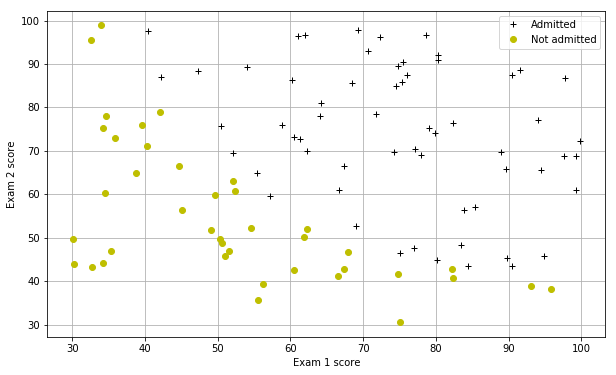

In [4]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

**1.1.2 [5pts] Sigmoid function** 

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$h_\theta(x) = g(\theta^Tx)$

where function g is the sigmoid function. The sigmoid function is defined as:

$g(z) = \dfrac{1}{1+e^{-z}}$

Your first step is to implement/find a sigmoid function so it can be called by the rest of your program. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element. 

When you are finished, (a) plot the sigmoid function, and (b) test the function with a scalar, a vector, and a matrix. For scalar large positive values of x, the sigmoid should be close to 1, while for scalar large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

0.622459331202
[ 0.50167321  0.62245933  0.72974065]
[[ 0.50167321  0.62245933  0.72974065]
 [ 0.50001135  0.62245933  0.73104965]
 [ 0.52976549  0.62245933  0.70698737]]


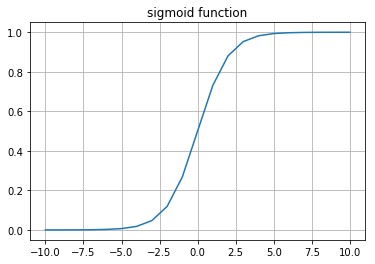

In [5]:
from scipy.special import expit # Hint: Vectorized sigmoid function

# -----------------------------------------------------------------

def sigmoid(x):
    """ Computes g(Z) """
    pred = expit(x)
    return pred

def graph():
    x_start, x_end = -10, 11
    y_start, y_end = 0, 1
    plt.figure(figsize=(6,4))
    x_ = np.arange(x_start, x_end).reshape((21,1))
    y_output = sigmoid(x_)
    plt.plot(x_, y_output, linestyle='solid')
    plt.grid(True)
    plt.title('sigmoid function')
    plt.show()
                    
print(sigmoid(0.5))
print(sigmoid([0.00669285,0.5,0.99330715]))
print(sigmoid([[6.69285092e-03,5.00000000e-01,9.93307149e-01],[4.53978687e-05,5.00000000e-01,9.99954602e-01],[1.19202922e-01,5.00000000e-01,8.80797078e-01]]))
graph()
# -----------------------------------------------------------------

**1.1.3 [15pts] Cost function and gradient**

Now you will implement the cost function and gradient for logistic regression. Complete the code
in the functions *h* and *computeCost* below to return the value of the hypothesis function and the cost, respectively. Recall that the cost function in logistic regression is

$j(\theta) \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ [ \ -y^{(i)} log(h_\theta(x^{(i)})) \ - \ (1 - y^{(i)})log(1-h_\theta(x^{(i)})) \ ]$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1,...,n$) is defined as follows:

$\frac{\partial J(\theta)}{\partial \theta_{j}} \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}$

where $m$ is the number of points and $n$ is the number of features. Note that while this gradient looks identical to the linear regression gradient, the formula is
actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
Once you are done, your costFunction will be called using the zeros as the initial parameters of $\theta$. You
should see that the cost is about 0.693. 

In [9]:
# Hypothesis function and cost function for logistic regression
def h(mytheta,myX): # Logistic hypothesis function
    # -----------------------------------------------------------------
    pred = myX.dot(mytheta)
    result = sigmoid(pred)
    return result
    # -----------------------------------------------------------------

# Cost function
def computeCost(mytheta,myX,myy): 
    """
    mytheta is an n-dimensional vector of initial theta guess
    myX is matrix with m-rows and n-columns
    myy is a matrix with m-rows and 1-column
    """
    # -----------------------------------------------------------------
    lg1 = np.log(h(mytheta,myX))
    lg2 = np.log(1 - h(mytheta,myX))
    cost = (np.transpose(myy).dot(lg1) + np.transpose(1 - myy).dot(lg2)) * (-1/myX.shape[0])
    return float(cost)
    # -----------------------------------------------------------------

In [10]:
# Check that with theta as zeros, cost is about 0.693:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

0.6931471805599452

**1.1.4 Learning parameters using *fmin***

In the previous assignment, you found the optimal parameters of a linear regression model by
implementing gradient descent. You wrote a cost function and calculated its gradient, then took
a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will
use a scipy.optimize built-in function called *fmin*.

The final $\theta$ value will then be used to plot the
decision boundary on the training data, as seen in the figure below.

In [11]:
# Note "fmin" does not need to be told explicitly the derivative terms
# It only needs the cost function, and it minimizes with the "downhill simplex algorithm."
# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy), maxiter=400, full_output=True)
    return result[0], result[1]

In [12]:
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [13]:
# Call your costFunction function using the optimal parameters of θ. 
# You should see that the cost is about 0.203.
# print(theta)
print(computeCost(theta,X,y))

0.2034977015902151


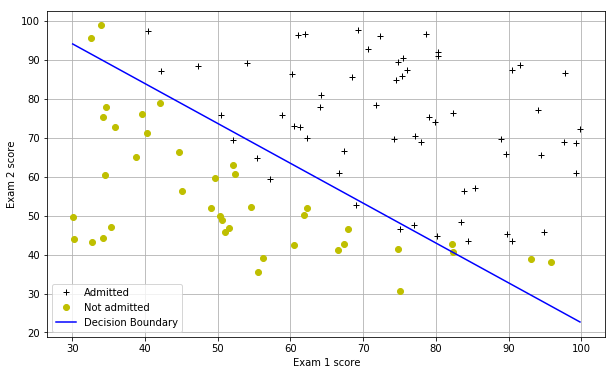

In [11]:
# Plotting the decision boundary: two points, draw a line between
# Decision boundary occurs when h = 0, or when
# theta0 + theta1*x1 + theta2*x2 = 0
# y=mx+b is replaced by x2 = (-1/theta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()

**1.1.5 [15pts] Evaluating logistic regression**

After learning the parameters, you can use the model to predict whether a particular student will
be admitted. 

(a) [5pts] Show that for a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should
expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the
learned model predicts on our training set. 

(b) [10 pts] In this part, your task is to complete the code in
*makePrediction*. The predict function will produce “1” or “0” predictions given a dataset and a learned
parameter vector $\theta$. After you have completed the code, the script below will proceed to report the
training accuracy of your classifier by computing the percentage of examples it got correct. You
should also see a Training Accuracy of 89.0. 

In [12]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
# you should expect to see an admission probability of 0.776.

# -----------------------------------------------------------------
myX = np.array([1,45,85])
print(h(theta,myX))
# -----------------------------------------------------------------

0.776291590411


In [14]:
def makePrediction(mytheta, myx):
    # -----------------------------------------------------------------
    init = np.zeros(myx.shape[0])
    for i in range(myx.shape[0]):
        if h(mytheta,myx)[i] >= 0.5:
            init[i] = 1
    return init
    # -----------------------------------------------------------------
# Compute the percentage of samples I got correct:
pos_correct = float(np.sum(makePrediction(theta,pos)))
neg_correct = float(neg.shape[0] - np.sum((makePrediction(theta,neg))))
tot = len(pos)+len(neg)
prcnt_correct = float(pos_correct+neg_correct)/tot
print("Fraction of training samples correctly predicted: %f." % prcnt_correct)

Fraction of training samples correctly predicted: 0.890000.


### 2. Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips in *ex2data2.txt*, from which you can build a logistic regression model.

**2.1 Visualizing the data**

Similar to the previous parts of this exercise, plotData is used to generate the figure below,
where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0,
rejected) examples are shown with different markers.

The figure below shows that our dataset cannot be separated into positive and negative examples by a
straight line. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

In [14]:
datafile = 'ex2data2.txt'
# Read in comma separated data
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) 
# Form the usual "X" data matrix and "y" label vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
# Insert the usual column of 1's into the "X" matrix (for bias incorporation)
X = np.insert(X,0,1,axis=1)

In [15]:
# Divide the sample into two: pos classification, neg classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
print(pos)
print(neg)

[[ 1.         0.051267   0.69956  ]
 [ 1.        -0.092742   0.68494  ]
 [ 1.        -0.21371    0.69225  ]
 [ 1.        -0.375      0.50219  ]
 [ 1.        -0.51325    0.46564  ]
 [ 1.        -0.52477    0.2098   ]
 [ 1.        -0.39804    0.034357 ]
 [ 1.        -0.30588   -0.19225  ]
 [ 1.         0.016705  -0.40424  ]
 [ 1.         0.13191   -0.51389  ]
 [ 1.         0.38537   -0.56506  ]
 [ 1.         0.52938   -0.5212   ]
 [ 1.         0.63882   -0.24342  ]
 [ 1.         0.73675   -0.18494  ]
 [ 1.         0.54666    0.48757  ]
 [ 1.         0.322      0.5826   ]
 [ 1.         0.16647    0.53874  ]
 [ 1.        -0.046659   0.81652  ]
 [ 1.        -0.17339    0.69956  ]
 [ 1.        -0.47869    0.63377  ]
 [ 1.        -0.60541    0.59722  ]
 [ 1.        -0.62846    0.33406  ]
 [ 1.        -0.59389    0.005117 ]
 [ 1.        -0.42108   -0.27266  ]
 [ 1.        -0.11578   -0.39693  ]
 [ 1.         0.20104   -0.60161  ]
 [ 1.         0.46601   -0.53582  ]
 [ 1.         0.67339   -0.5

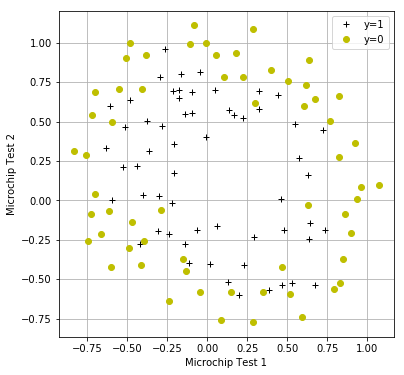

In [16]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

# Square plot to emphasize circular features
plt.figure(figsize=(6,6))
plotData()

**2.2 Nonlinear feature mapping**

One way to fit the data better is to create more features from each data point. In *mapFeature* below, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the
sixth power as follows:

\begin{equation}
mapFeature(x) \ = \
\begin{bmatrix}
    1 \\
    x_1 \\
    x_2 \\
    x_1^2 \\
    x_1x_2 \\
    x_2^2 \\
    x_1^3 \\
    \vdots \\
    x_1x_2^5 \\
    x_2^6 \\
\end{bmatrix}
\end{equation}

As a result of this mapping, our vector of two features (the scores
on two QA tests) has been transformed into a 28-dimensional
vector. A logistic regression classifier trained on this
higher-dimension feature vector will have a more complex
decision boundary and will appear nonlinear when drawn in our
2-dimensional plot.
While the feature mapping allows us to build a more expressive
classifier, it is also more susceptible to overfitting. In the next parts
of the exercise, you will implement regularized logistic regression
to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [18]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a nx28-dim matrix of featuers
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [19]:
# Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

**2.3 Cost function and gradient**

Now you will implement code to compute the cost function and gradient for regularized logistic
regression. Recall that the regularized cost function in logistic regression is:

$j(\theta) \ = \ [ \ \frac{1}{m} \ \sum_{i=1}^{m} \ [ \ -y^{(i)} log(h_\theta(x^{(i)})) \ - \ (1 - y^{(i)})log(1-h_\theta(x^{(i)})) \ ] \ ] \ + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $

Note that you should not regularize the parameter $\theta_0$ (Why not? Think about why that would be a bad idea).

The gradient of the cost function is a vector where the j element is defined as follows (you should understand how to obtain this expression):

$\frac{\partial J(\theta)}{\partial \theta_{0}} \ = \ \frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)} \quad \quad \quad \quad \quad \quad$ for $\quad j=0$

$\frac{\partial J(\theta)}{\partial \theta_{j}} \ = \ (\frac{1}{m} \ \sum_{i=1}^{m} \ (h_\theta(x^{(i)})-y^{(i)}) x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad \quad \quad$ for $\quad j \ge 1$

**2.3.1 [10pts] Implementing regularized logistic regression**

Re-implement computeCost with regularization.

In [22]:
# Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 
    """
    mytheta is an n-dimensional vector of initial theta guess
    myX is matrix with n-columns and m-rows
    myy is a matrix with m-rows and 1-column
    This includes regularization if you set mylambda to nonzero
    """
    # -----------------------------------------------------------------
    lg1 = np.log(h(mytheta,myX))
    lg2 = np.log(1 - h(mytheta,myX))
    cost1 = (np.transpose(myy).dot(lg1) + np.transpose(1 - myy).dot(lg2)) * (-1/myX.shape[0])
    cost2 = (mylambda / (2 * m)) * (np.transpose(mytheta).dot(mytheta))
    cost = cost1 + cost2
    return float(cost)
    # -----------------------------------------------------------------

Once you are done, you will call your cost function using the initial value of
θ (initialized to all zeros). You should see that the cost is about 0.693. 

In [23]:
# Let's check that the cost function returns a cost of 0.693 with zeros for initial theta,
# and regularized x values
initial_theta = np.zeros((mappedX.shape[1],1))
computeCost(initial_theta,mappedX,y)

0.6931471805599452

**2.3.2 [15pts] Learning parameters using *minimize***

You will use *optimize.minimize* to learn the optimal parameters $\theta$. If you
have completed the cost and gradient for regularized logistic regression correctly, you should be able to learn the parameters
$\theta$ using *minimize*. Implement the function *optimizeRegularizedTheta* below.  

In [21]:
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    # -----------------------------------------------------------------
    result = optimize.minimize(computeCost, x0=mytheta, args=(myX, myy, mylambda), options={'maxiter': 10000, 'disp': True})
    return result.x, result.fun
    # -----------------------------------------------------------------

theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)
print(theta)
print(mincost)

Optimization terminated successfully.
         Current function value: 0.225651
         Iterations: 604
         Function evaluations: 18570
         Gradient evaluations: 619
[   29.48327426    36.29128054    56.58700615  -287.4026685   -160.79982444
  -155.73882987  -241.53092685  -494.66866802  -410.2652536   -271.48745027
   912.79725115  1022.29993025  1462.2712588    736.09105031   370.74969556
   383.74681355   972.65412172  1449.7992487   1559.24961615   928.65947351
   392.99757015  -953.33895156 -1619.35411328 -2802.92148894 -2791.12467878
 -2711.7563065  -1293.27862506  -439.34759694]
0.22565079539110527


**2.4 Plotting the decision boundary**

To help you visualize the model learned by this classifier, we have provided the function
*plotBoundary* which plots the (non-linear) decision boundary that separates the
positive and negative examples. 

In [22]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    # display text on top of the decision boundary
    plotData()
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

**2.4.1 [10pts] Plot Decision Boundaries**

(a) [4 pts] Use *plotBoundary* to obtain four subplots of the decision boundary for the following values of the regularization parameter: $\lambda \ = \ 0, 1, 10, 100$

(b) [2 pts] Comment on which plots are overfitting and which plots are underfitting.

(c) [2 pts] Which is the model with the highest bias? The highest variance?

(d) [2 pts] What is another way to detect overfitting?

Optimization terminated successfully.
         Current function value: 0.225651
         Iterations: 604
         Function evaluations: 18570
         Gradient evaluations: 619
Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.651183
         Iterations: 19
         Function evaluations: 600
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.686527
         Iterations: 4
         Function evaluations: 150
         Gradient evaluations: 5


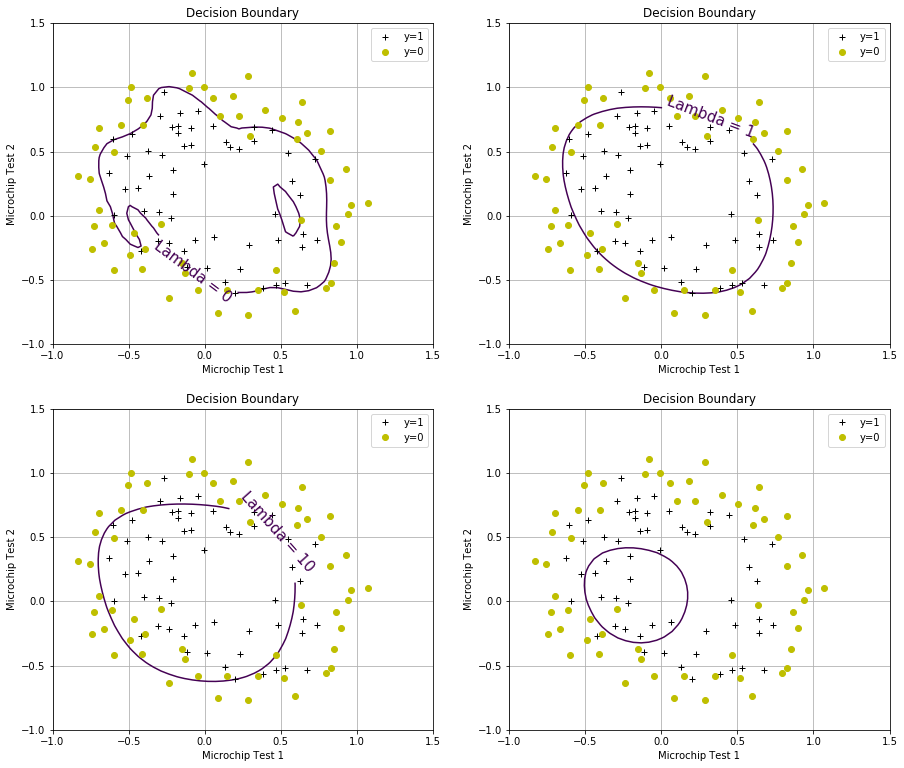

In [23]:
# (a) Build a figure showing contours for various values of regularization parameter, lambda

# -----------------------------------------------------------------
fig = plt.figure(figsize=(15,13))

fig.add_subplot(221)
plotBoundary(initial_theta,mappedX,y,0)

fig.add_subplot(222)
plotBoundary(initial_theta,mappedX,y,1)

fig.add_subplot(223)
plotBoundary(initial_theta,mappedX,y,10)

fig.add_subplot(224)
plotBoundary(initial_theta,mappedX,y,100)
# -----------------------------------------------------------------

**[Click here to insert your solution for (b), (c), and (d)]**

(b) Lambda = 0 is overfitting whereas Lambda = 100 is underfitting

(c) Underfitting model (Lambda = 100) tends to have the highest bias but lowest variance, while overfitting model (Lambda = 0) tends to have the lowest bias but highest variance. 

(d) Overfitting models tend to have lower cost, larger iterations, Function evaluations, and Gradient evaluations

Right Answer:
Plot the train and test loss as a function of lambda, the point where the training loss 
continues to decrease but the testing loss increases and continues to increase is when 
the model starts overfitting.

### 3. Written part

These problems are extremely important preparation for the exam. Submit solutions to each problem by filling the markdown cells below.

**3.1 [10pts]** Maximum likelihood for Logistic Regression

Showing all steps, derive the LR cost function using maximum likelihood. Assume that
the probability of y given x is described by:

$P(\ y=1 \; \vert \; x \ ; \ \theta \ ) = h_{\theta}(x)$ 

$P(\ y=0 \; \vert \; x \ ; \ \theta \ ) = 1 - h_{\theta}(x)$





**[Click here to insert your solution]**
$$\mathcal L (x^{(i)}|\mu) = \mu^{x^{(i)}} (1-\mu)^{1-{x^{(i)}}}$$

$$ P(D|\mu) = \prod_i \mathcal L (x^{(i)}|\mu)$$

In this case we have:

$$L(\theta) = \prod_i \mathcal h_{\theta}(x)^{y^{(i)}} (1-h_{\theta}(x))^{1-y^{(i)}}$$

Since log is a monotonic transformation, we have:

$$ \ln L(\theta) = l(\theta)= \sum_i(\ln h_{\theta}(x)^{y^{(i)}} + \ln (1-h_{\theta}(x))^{1-y^{(i)}})$$

$$ l(\theta) = \sum_iy^{(i)}\ln h_{\theta}(x) + (1-y^{(i)})\ln (1-h_{\theta}(x))$$

The cost function is the averaged total cost from all observations, so:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}y^{(i)}logh_{\theta}(x^{(i)}) + (1-y^{(i)})log(1 - h_{\theta}(x^{(i)})) $$ 

With maximum likelihood approach, the goal is to maximize this log-likelihood function. This is the same as minimizing the negative of the above function. So the cost can also be written as:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}y^{(i)}logh_{\theta}(x^{(i)}) + (1-y^{(i)})log(1 - h_{\theta}(x^{(i)})) $$


**3.2 [10pts]** Logistic Regression Classification with Label Noise

Suppose you are building a logistic regression classifier for images of dogs, represented by a feature vector x, into one of two categories $y \in \{0,1\}$, where 0 is “terrier” and 1 is “husky.” You decide to use the logistic regression model $p(y = 1 \ \vert \ x) = h_{\theta}(x)=\theta^Tx.$ You collected an image dataset **D**$\ = \{x^{(i)},t^{(i)}\}$, however, you were very tired and made
some mistakes in assigning labels $t^{(i)}.$ You estimate that you were correct in about $\tau$ fraction of all cases.

(a) Write down the equation for the posterior probability $p(t = 1 \ \vert \ x)$ of the label being 1 for some point x, in terms of the probability of the true class, $p(y = 1 \ \vert \ x).$

(b) Derive the modified cost function in terms of $\ \theta, x^{(i)},t^{(i)}$ and $\tau$.

**[Click here to insert your solution]**

(a) 

$ P(t = 1 \; \vert \; x) = P(y = 1 \; \vert \; x)P(getting \; it \; correctly) + P(y = 0 \; \vert \; x)P(getting \;it \; incorrectly) $

$ = \tau P(y = 1 \; \vert \; x) + (1 - \tau) P(y = 0 \; \vert \;x) $

$ = \tau P(y = 1 \; \vert \; x) + (1 - \tau) (1 - P(y = 1 \; \vert \;x)) $

$ = (2\tau - 1)P(y = 1 \; \vert \; x) + (1 - \tau) $

(b)

As we have derived cost function: 

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}y^{(i)}logh_{\theta}(x^{(i)}) + (1-y^{(i)})log(1 - h_{\theta}(x^{(i)})) $$

With the expression for $P(t = 1 \; \vert \; x)$ dervied from part (a), we can just substitute: $y^{(i)} \; \; by \; \; t^{(i)}$ and $h_{\theta}(x^{(i)}) = P(y = 1 \; \vert \; x) \; \; by \;  \; (2\tau - 1)h_{\theta}(x^{(i)}) + (1 - \tau)$ 

The new cost function is then:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}t^{(i)}log[(2\tau - 1)h_{\theta}(x^{(i)}) + (1 - \tau)] + (1 - t^{(i)})log[(1 - 2\tau)h_{\theta}(x^{(i)}) + \tau] $$

**3.3 [10pts] Cross-entropy loss for multiclass classification**

This problem asks you to derive the cross-entropy loss for a multiclass classification problem using maximum likelihood.
Consider the multiclass classification problem in which each input is assigned to one of $K$ mutually exclusive classes. The binary target variables $y_k$ ∈ {0, 1} have a "one-hot" coding scheme, where the value is 1 for the indicated class and 0 for all others. Assume that we can interpret the network outputs as $h_k(x,\theta) = p(y_k = 1|x)$, or the probability of the kth class.

Show that the maximum likelihood estimate of the parameters $\theta$ can be obtained by minimizing the multiclass *cross-entropy* loss function 
<p>
$L(\theta)= - \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$
</p>
<p>
where $N$ is the number of examples $\{x_i,y_i\}$. </p>

**[Click here to insert your solution]**

Instead of binary response where $y_i = 0$ or $y_i = 1$ in logistic regression, here we have a multinomial response where $y_i$ can take on any of the K outcomes: $y_i = 1, 2, 3, ..., K$

$P(y_ik = 1|x) = h_k(x_i,\theta)$ = probability that $y_i$ belongs to class k given x

For data point i:

$$P(y_{ik} = 1|x) = P(y_{i1} = 1 \vert x)^{y_{i1}}P(y_{i2} = 1 \vert x)^{y_{i2}}......P(y_{ik} = 1 \vert x)^{y_{ik}}$$

Since only one element in the collection ${ y_{i1}, y_{i2}, ..., y_{ik} }$ is 1 and all other elements are 0, the above expression only retain the term $P(y_{ij} = 1 \vert x)^{y_{ij}}$ where $j \in (1, 2, ..., k)$, all other terms reduce to 1, so:

$$P(y_{ik} = 1|x) = \prod_{k = 1}^{K}P(y_{ik} = 1|x)^{y_{ik}} \; \; \; (for \; any\; data \; point \; i)$$

For all data points i = 1, 2, ..., N, taking the product on both sides over i:

$$\prod_{i = 1}^{N}P(y_{ik} = 1|x) = \prod_{i = 1}^{N}\prod_{k = 1}^{K}P(y_{ik} = 1|x)^{y_{ik}} = \prod_{i = 1}^{N}\prod_{k = 1}^{K}h_k(x_i,\theta)^{y_{ik}} $$

The expression above is the likelihood function (joint probability) of all observed data. Taking the natural log of the expression above and normalize by the number of data points we obtain the log likelihood function:

$$l(\theta)= \frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$$

With maximum likelihood approach, the goal is to maximize this log-likelihood function. This is the same as minimizing the negative of the above function. So the cost can also be written as:

$$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(h_k(x_i,\theta))$$